# Week 2 Problems :

# Matplotlib Intro Problems


### Problem 1:


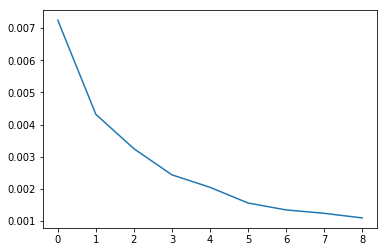

In [9]:
import numpy as np
from matplotlib import pyplot as plt

def find_variance(n):
    std_nm_array = np.random.normal(size=(n,n))
    means = np.mean(std_nm_array, axis = 1)
    return np.var(means)

def plot_var():
    x = np.arange(100, 1000, 100)
    plt.plot(np.array([find_variance(i) for i in x]))
    plt.show()
plot_var()

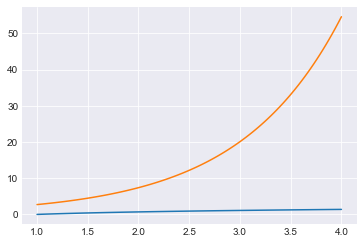

In [171]:
plt.ion()
x = np.linspace(1, 4, 100)
plt.plot(x, np.log(x))
plt.plot(x, np.exp(x))
#plt.clf()
#plt.ioff()

### Problem 2:

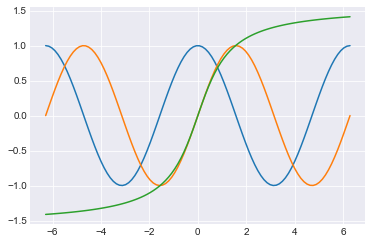

In [172]:
def graph_trig():
    x = np.linspace(- 2 * np.pi, 2 * np.pi, 100)
    cosy = np.cos(x)
    siny = np.sin(x)
    arctany = np.arctan(x)
    plt.plot(x, cosy)
    plt.plot(x, siny)
    plt.plot(x, arctany)
    plt.show()
graph_trig()

### Problem 3:

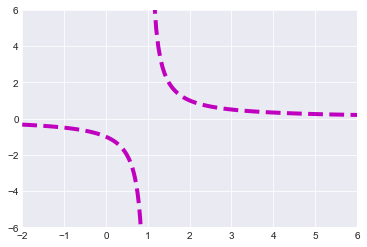

In [173]:
def graph_f():
    x1 = np.linspace(-2, 1, 100)
    x1 =  x1[:-1]   # cut off last entry which is one.
    x2 = np.linspace(1, 6, 100)
    x2 = x2[1:] # cuts off the first entry which is one. 
    y1 = 1 / (x1 - 1)
    y2 = 1 / (x2 - 1)
    plt.plot(x1, y1, 'm--', lw=4)
    plt.plot(x2, y2, 'm--', lw=4)
    plt.xlim(-2, 6)
    plt.ylim(-6, 6)
    plt.show()
graph_f() 

### Problem 4:

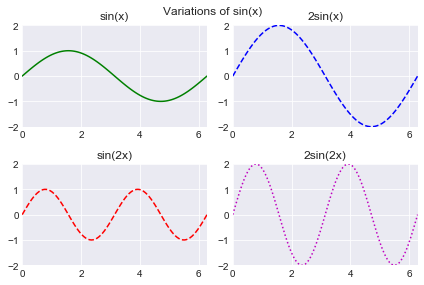

In [174]:
def more_trig_graphs():
    x = np.linspace(0, 2*np.pi, 100)
    fig , axes = plt.subplots(2, 2)
    axes[0][0].plot(x, np.sin(x), 'g-')
    axes[1][0].plot(x, np.sin(2*x), 'r--')
    axes[0][1].plot(x, 2*np.sin(x), 'b--')
    axes[1][1].plot(x, 2*np.sin(2*x), 'm:')
    axes[0][0].axis([0, 2*np.pi, -2, 2])
    axes[1][0].axis([0, 2*np.pi, -2, 2])
    axes[0][1].axis([0, 2*np.pi, -2, 2])
    axes[1][1].axis([0, 2*np.pi, -2, 2])
    axes[0][0].set_title("sin(x)")
    axes[1][0].set_title("sin(2x)")
    axes[0][1].set_title("2sin(x)")
    axes[1][1].set_title("2sin(2x)")
    fig.suptitle("Variations of sin(x)")
    plt.tight_layout()
    plt.show()
more_trig_graphs()

### Problem 5:

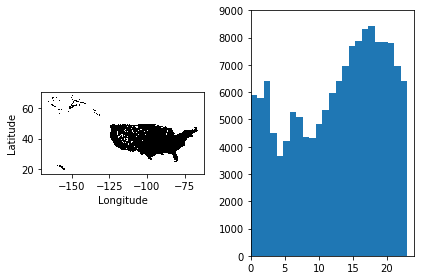

In [13]:
def plot_crashes():
    crash_data = np.load('FARS.npy')
    fig , axes = plt.subplots(1,2)
    axes[0].plot(crash_data[:, 1], crash_data[:, 2], 'k,')
    axes[0].set_aspect("equal")
    axes[0].set_xlabel("Longitude")
    axes[0].set_ylabel("Latitude")
    axes[1].hist(crash_data[:,0], bins=24)
    axes[1].axis([0, 24, 0, 9000]) # consider maximixizing the sum. Or finding the default value for y max
    plt.tight_layout()
    plt.show()
plot_crashes()


### Problem 6:

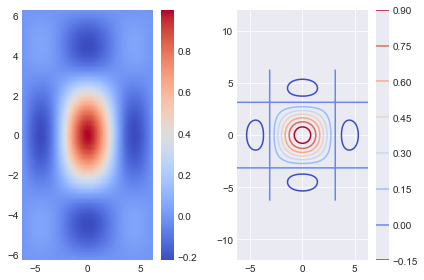

In [176]:
def plot_g():
    #Create a 2-D domain with np.meshgrid()
    x = np.linspace(-2* np.pi, 2 * np.pi, 200)
    y = x.copy()
    X, Y = np.meshgrid(x, y)
    Z = (np.sin(X)*np.sin(Y)) / (X*Y)
    
    #Plot the heat map of g over the 2-D domain.
    plt.subplot(121)
    plt.pcolormesh(X, Y, Z, cmap="coolwarm")
    plt.colorbar()
    plt.axis([-2* np.pi, 2 * np.pi, -2* np.pi, 2 * np.pi])
    
    #Plot a contour map of g
    plt.subplot(122)
    plt.contour(X, Y, Z, 10, cmap = "coolwarm")
    plt.colorbar()
    plt.axis([-2* np.pi, 2 * np.pi, -2* np.pi, 2 * np.pi])
    plt.axis("equal")

    plt.tight_layout()
    plt.show()
plot_g()
    




# Data Visualization Problems

### Problem 1:

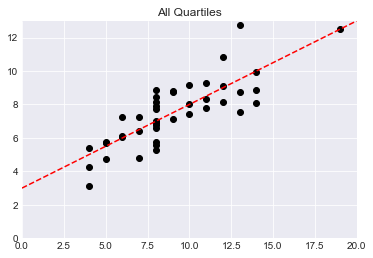

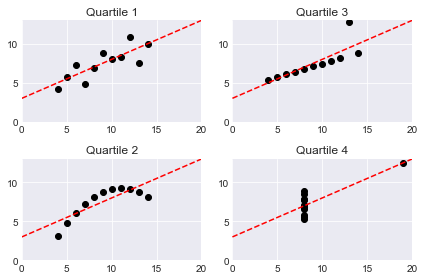


Quartiles	Mean X	Mean Y	Variance X	Variance Y	Slope	Intercept	CC
Quartile 1	9.0	7.501	10.0		3.752		0.5	3.0		0.816
Quartile 2	9.0	7.501	10.0		3.752		0.5	3.001		0.816
Quartile 3	9.0	7.5	10.0		3.748		0.5	3.002		0.816
Quartile 4	9.0	7.501	10.0		3.748		0.5	3.002		0.817



In [177]:
from scipy import stats
import scipy
def anscombe():
    # main plot. This isn't required but made it for refrence.
    data = np.load("anscombe.npy")
    data = data.reshape(44, 2)
    plt.plot(data[:, 0], data[:, 1], 'ko')
    plt.axis([0, 20, 0, 13])
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[:, 0], data[:, 1])
    predict_y = intercept + slope * np.linspace(0, 20, 50)
    plt.plot(np.linspace(0, 20, 50), predict_y, 'r--')
    plt.title("All Quartiles")

    plt.show()
    
    fig, axes = plt.subplots(2, 2)
    data = np.load('anscombe.npy')
    quartile1 = data[:,:2]
    quartile2 = data[:, 2:4]
    quartile3 = data[:, 4:6]
    quartile4 = data[:, 6:8]
    #Plot 1 
    axes[0][0].plot(quartile1[:,0], quartile1[:,1], 'ko')
    axes[0][0].axis([0, 20, 0, 13])
    slope1, intercept1, r_value1, p_value, std_err = stats.linregress(quartile1[:, 0], quartile1[:, 1])
    predict_y = intercept1 + slope1 * np.linspace(0, 20, 50)
    axes[0][0].plot(np.linspace(0, 20, 50), predict_y, 'r--')
    axes[0][0].set_title("Quartile 1")

    #Plot 2
    axes[1][0].plot(quartile2[:,0], quartile2[:,1], 'ko')
    axes[1][0].axis([0, 20, 0, 13])
    slope2, intercept2, r_value2, p_value, std_err = stats.linregress(quartile2[:, 0], quartile2[:, 1])
    predict_y = intercept2 + slope2 * np.linspace(0, 20, 50)
    axes[1][0].plot(np.linspace(0, 20, 50), predict_y, 'r--')
    axes[1][0].set_title("Quartile 2")

    #Plot 3
    axes[0][1].plot(quartile3[:,0], quartile3[:,1], 'ko')
    axes[0][1].axis([0, 20, 0, 13])
    slope3, intercept3, r_value3, p_value, std_err = stats.linregress(quartile3[:, 0], quartile3[:, 1])
    predict_y = intercept3 + slope3 * np.linspace(0, 20, 50)
    axes[0][1].plot(np.linspace(0, 20, 50), predict_y, 'r--')
    axes[0][1].set_title("Quartile 3")

    #Plot 4
    axes[1][1].plot(quartile4[:,0], quartile4[:,1], 'ko')
    axes[1][1].axis([0, 20, 0, 13])
    slope4, intercept4, r_value4, p_value, std_err = stats.linregress(quartile4[:, 0], quartile4[:, 1])
    predict_y = intercept4 + slope4 * np.linspace(0, 20, 50)
    axes[1][1].plot(np.linspace(0, 20, 50), predict_y, 'r--')
    axes[1][1].set_title("Quartile 4")

    plt.tight_layout()
    plt.show()
    print("\nQuartiles\tMean X\tMean Y\tVariance X\tVariance Y\tSlope\tIntercept\tCC\n" + 
        "Quartile 1\t" +  str(round(np.mean(quartile1[:, 0]), 3)) + "\t" + str(round(np.mean(quartile1[:, 1]), 3)) +
        "\t" + str(round(np.var(quartile1[:, 0]), 3)) + "\t\t" + str(round(np.var(quartile1[:, 1]), 3)) + "\t\t" +
        str(round(slope1,3)) + "\t" + str(round(intercept1,3)) + "\t\t" + str(round(r_value1,3)) + "\n" +
        "Quartile 2\t" +  str(round(np.mean(quartile2[:, 0]), 3)) + "\t" + str(round(np.mean(quartile2[:, 1]), 3)) + 
        "\t" + str(round(np.var(quartile2[:, 0]), 3)) + "\t\t" + str(round(np.var(quartile2[:, 1]), 3)) + "\t\t" +
        str(round(slope2,3)) + "\t" + str(round(intercept2,3)) + "\t\t" + str(round(r_value2,3)) + "\n" +
        "Quartile 3\t" +  str(round(np.mean(quartile3[:, 0]), 3)) + "\t" + str(round(np.mean(quartile3[:, 1]), 3)) +
        "\t" + str(round(np.var(quartile3[:, 0]), 3)) + "\t\t" + str(round(np.var(quartile3[:, 1]), 3)) + "\t\t" +
        str(round(slope3,3)) + "\t" + str(round(intercept3,3)) + "\t\t" + str(round(r_value3,3)) + "\n"
        "Quartile 4\t" +  str(round(np.mean(quartile4[:, 0]), 3)) + "\t" + str(round(np.mean(quartile4[:, 1]), 3)) +
        "\t" + str(round(np.var(quartile4[:, 0]), 3)) + "\t\t" + str(round(np.var(quartile4[:, 1]), 3)) + "\t\t" +
        str(round(slope4,3)) + "\t" + str(round(intercept4,3)) + "\t\t" + str(round(r_value4,3)) + "\n")
anscombe()   # CONSIDER LABELING EACH GRAPH. 


**EXPLAIN ABOVE THE DIFFERENCES!!!!!!!!**

### Problem 2:

/Users/cacheellsworth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in reciprocal
  if sys.path[0] == '':
/Users/cacheellsworth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
/Users/cacheellsworth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in power
  if sys.path[0] == '':


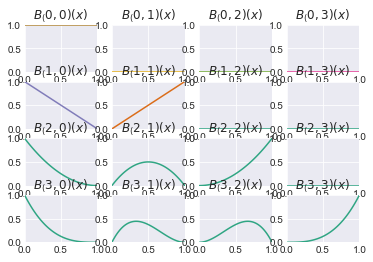

In [195]:
def plot_Bernstein():
    N = 4
    V = 4
    x = np.linspace(0.001, 1, 100)
    fig, axes = plt.subplots(N, V)
    plt.figure(figsize=(6,6))
    plt.style.use('seaborn-darkgrid')
    palette =plt.get_cmap('Dark2_r')
    for n in range(N):
        for v in range(V):
            place = (n+1) * 4 - 3 + v
            bernie = scipy.special.comb(n, v) * x ** v * (1 - x) ** (n - v)
            axes[n][v].plot(x, bernie, color=palette(place), alpha =0.9)
            axes[n][v].axis([0, 1, 0, 1])
            axes[n][v].set_title(r"$B_{}(x)$".format((n, v)))
    plt.tight_layout()
    plt.show()
plot_Bernstein()

## Consider getting rid of these errors!!!!!!!!!!!!!!!

### Problem 3:

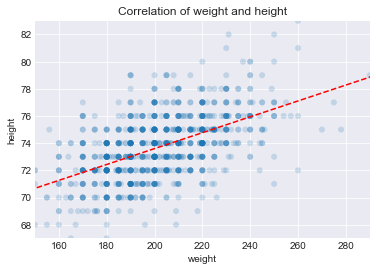

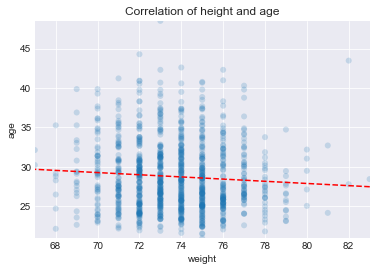

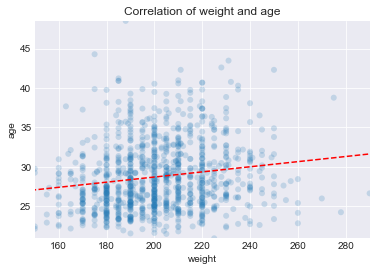

In [209]:
mlb_data = np.load('MLB.npy')
height = mlb_data[:, 0]
weight = mlb_data[:, 1]
age = mlb_data[:, 2]

#figure 1 weight vs height
plt.scatter(weight, height, alpha=.2, edgecolor='none')
plt.axis([np.min(weight), np.max(weight) , np.min(height), np.max(height)])
plt.xlabel("weight")
plt.ylabel("height")
plt.title("Correlation of weight and height")
slope, intercept, r_value, p_value, std_err = stats.linregress(weight, height)
predict_y = intercept + slope * np.linspace(0, 300, 500)
plt.plot(np.linspace(0, 300, 500), predict_y, 'r--')
plt.show()

# figure 2 height vs age
plt.scatter(height, age, alpha=.2, edgecolor='none')
plt.axis([np.min(height), np.max(height), np.min(age), np.max(age)])
plt.xlabel("height")
plt.ylabel("age")
plt.title("Correlation of height and age")
slope, intercept, r_value, p_value, std_err = stats.linregress(height, age)
predict_y = intercept + slope * np.linspace(0, 300, 500)
plt.plot(np.linspace(0, 300, 500), predict_y, 'r--')
plt.show()

# Figure 3 Weight vs Age
plt.scatter(weight, age, alpha=.2, edgecolor='none')
plt.axis([np.min(weight), np.max(weight) , np.min(age), np.max(age)])
plt.xlabel("weight")
plt.ylabel("age")
plt.title("Correlation of weight and age")
slope, intercept, r_value, p_value, std_err = stats.linregress(weight, age)
predict_y = intercept + slope * np.linspace(0, 300, 500)
plt.plot(np.linspace(0, 300, 500), predict_y, 'r--')
plt.show()


### Problem 4:

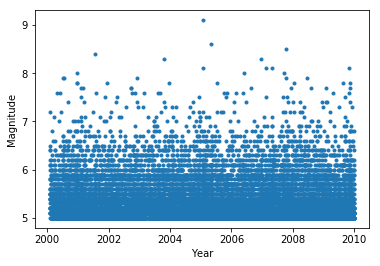

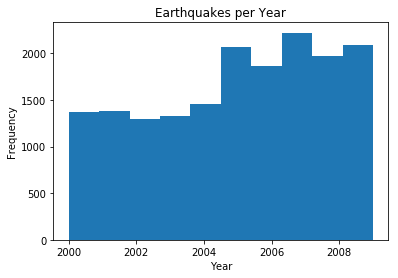

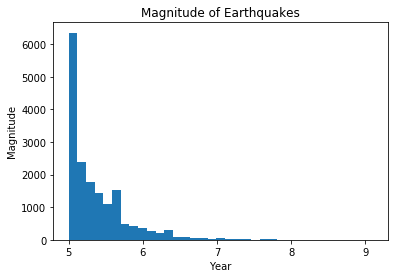

{2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0}


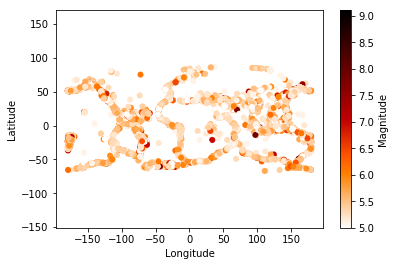

In [19]:
year, magnitude, longitude, latitude  = np.load("earthquakes.npy").T

# Poor Graph
plt.plot(year, magnitude, '.')
plt.xlabel("Year")
plt.ylabel("Magnitude")

plt.show()

# Graph how many earthquakes happened every year
year_floor = np.floor(year)
numofyears = set(year_floor)
plt.hist(year_floor, bins=10)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Earthquakes per Year")
plt.show()
# Graph that answers How often do stronger earthquakes happen?
plt.hist(magnitude, bins=35)
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.title("Magnitude of Earthquakes")
plt.show()

#Graph where do earthquakes happen and where do the strongest earthquakes happen
plt.scatter(longitude, latitude, lw=.001, c=magnitude, cmap='gist_heat_r')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar = plt.colorbar()
plt.axis('equal')
cbar.set_label("Magnitude")
print(numofyears)
plt.show()


### Problem 5:

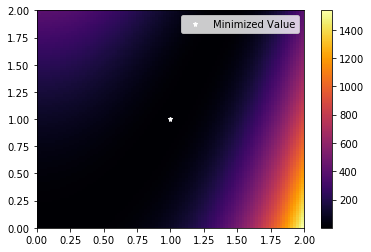

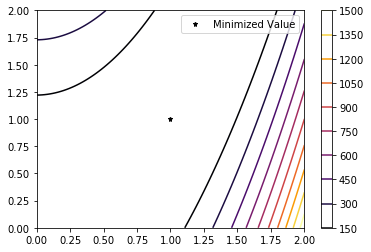

In [22]:
# Rosenbrock function

x = np.linspace(0, 2, 100)
X, Y = np.meshgrid(x, x)
Z = (1 - X)**2 + 100*(Y - X**2)**2
plt.pcolormesh(X, Y, Z, cmap='inferno')
plt.plot(1, 1, 'w*', markersize=5, label="Minimized Value")
plt.colorbar()
plt.legend()
plt.axis([0, 2, 0 , 2])
plt.show()
plt.contour(X, Y, Z, 15, cmap='inferno')
plt.plot(1, 1, 'k*', markersize=5, label="Minimized Value")
plt.colorbar()
plt.legend()
plt.axis([0, 2, 0, 2])
plt.show()

### Problem 6:

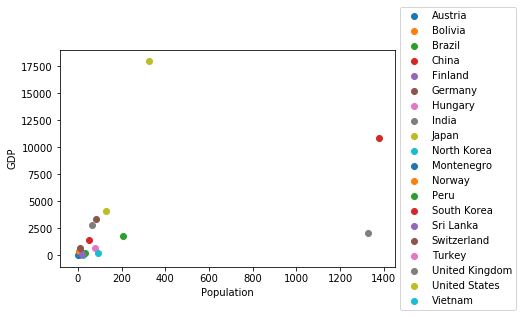

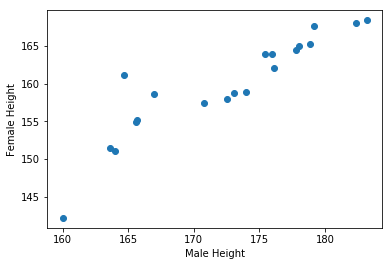

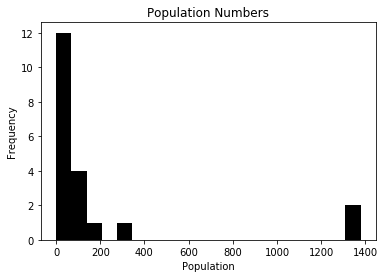

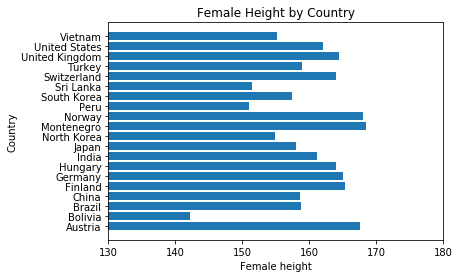

In [23]:
country_data = np.load("countries.npy")
population = country_data[:, 0]
gdp = country_data[:, 1]
male_height = country_data[:, 2]
female_height = country_data[:, 3]
countries = ["Austria", "Bolivia", "Brazil", "China",
            "Finland", "Germany", "Hungary", "India",
            "Japan", "North Korea", "Montenegro", "Norway",
            "Peru", "South Korea", "Sri Lanka", "Switzerland",
            "Turkey", "United Kingdom", "United States", "Vietnam"]
#Fig 1 Scatter
for i in range(len(countries)):
    plt.scatter(population[i], gdp[i], label=countries[i])
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel("Population")
plt.ylabel("GDP")
plt.show()
#FIG 2 scatter
plt.scatter(male_height, female_height)
plt.xlabel("Male Height")
plt.ylabel("Female Height")
plt.show()

#Fig 3 histogram
plt.hist(population, bins=20, orientation='vertical', color="black")
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Numbers')
plt.show()

#fig 4- Bar Chart
x = np.arange(len(countries))
plt.barh(x, female_height, align='center')
plt.yticks(x, countries)
plt.ylabel('Country')
plt.xlabel('Female height')
plt.xlim(130, 180)
plt.title("Female Height by Country")
plt.show()




# Pandas 1:

### Problem 1:

In [296]:
#import pydataset as data
import pandas as pd
import numpy as np

index = np.arange(0, 52, 2)
entries = index ** 2 - 1
series = pd.Series(entries, index, name="My First Series")
for i in series.index:
    if (i % 3 == 0):
        series[i] = 0
print(series)

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
Name: My First Series, dtype: int64


### Problem 2:

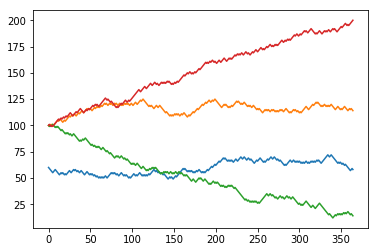

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def investment(prob, d=100):
    dates = pd.date_range("1/1/2000", "12/31/2000", freq='D')
    daily_draw = np.zeros(len(dates))
    stash = d
    stock = pd.Series([d], index=[str(dates[0])])
    for i in range(1, len(dates) - 1):
        dd =  np.random.binomial(1, prob)
        if dd == 0:
            stash += 1
            stock[str(dates[i+1])] = stash
        elif dd == 1:
            stash -= 1
            if stash < 0:
                stash = 0
            stock[str(dates[i+1])] = stash
        else:
            print("something is wrong")

    return stock
series_stock = investment(.5, 60)
plt.plot(np.arange(len(series_stock)), series_stock)
series_stock_2 = investment(.5, 100)
plt.plot(np.arange(len(series_stock_2)), series_stock_2)
series_stock_3 = investment(.6, 100)
plt.plot(np.arange(len(series_stock_3)), series_stock_3)
series_stock_4 = investment(.4, 100)
plt.plot(np.arange(len(series_stock_4)), series_stock_4)

plt.show()

### Problem 3:

In [68]:
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [75]:
studentInfo[(studentInfo['Sex']=='M') & (studentInfo['Age'] > 19)][['ID','Name']]


,ID,Name
0,0,Mylan
6,6,Matt


### Problem 4:

In [87]:
newdata = pd.merge(studentInfo, otherInfo, on='ID')[studentInfo['Sex']=='M'][['ID', 'Age', 'GPA']]
print(newdata)

   ID  Age  GPA
0   0   20  3.8
2   2   18  3.0
4   4   19  2.8
6   6   20  3.8
7   7   19  3.4


### Problem 5:

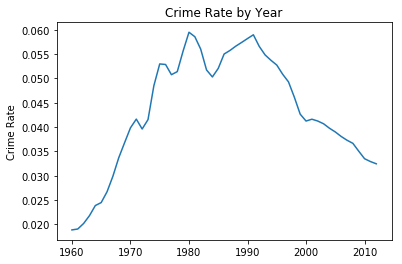

Highest 5 years of Crime Rate
Year
1980    0.059500
1991    0.058978
1981    0.058582
1990    0.058203
1989    0.057410
Name: Crime Rate, dtype: float64
Average number of total crimes
10638068.075471697
Average number of burglary crimes between 1960 and 2012: Burglary    2.446286e+06
dtype: float64
Years which total crime is below average but the number of burglaries was above average: Int64Index([1973, 1974], dtype='int64', name='Year')


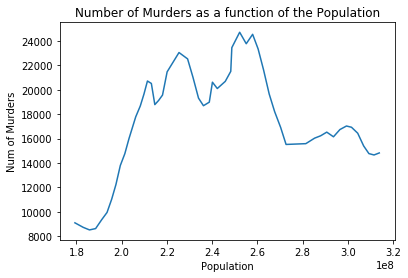

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989], dtype='int64', name='Year')


In [212]:
crime_data = pd.read_csv("crime_data.txt", skiprows=1, header=0, index_col=0)
crime_data.dropna()
crime_rate = crime_data["Total"] / crime_data["Population"]
crime_data["Crime Rate"] = crime_rate
plt.plot(crime_data['Crime Rate'])
plt.title('Crime Rate by Year')
plt.ylabel('Crime Rate')
plt.show()
print("Highest 5 years of Crime Rate")
print(crime_data.sort_values('Crime Rate', ascending=False)[:5]['Crime Rate']) # Print highest 5 years of crime rate.
print('Average number of total crimes')
average = np.mean(crime_data['Total'])
print(average)
average_burgl = np.mean(crime_data[(crime_data.index > 1959) & (crime_data.index < 2013)][['Burglary']])
print("Average number of burglary crimes between 1960 and 2012:", average_burgl)
above_below= crime_data[(crime_data['Total'] < (int(average)+.5)) & (crime_data['Burglary'] > (int(average_burgl)+.5))][['Total']]
print("Years which total crime is below average but the number of burglaries was above average:", above_below.index)
plt.plot(crime_data['Population'], crime_data['Murder'])
plt.title("Number of Murders as a function of the Population")
plt.xlabel("Population")
plt.ylabel("Num of Murders")
plt.show()
crime_subset = crime_data[20:30][['Population', 'Violent', 'Robbery']]
print(crime_subset.index)
crime_subset.to_csv('crime_subset.csv')

### Problem 6

In [84]:
titanic_data = pd.read_csv("titanic.csv", header=0, index_col=None)
titanic_data.drop(columns=['Sibsp', 'Parch', 'Cabin', 'Boat', "Body", 'home.dest'])
titanic_data = titanic_data.dropna(subset=['Survived'])
titanic_data.loc[titanic_data.Survived == 0, 'Survived'] = False
titanic_data.loc[titanic_data.Survived == 1, 'Survived'] = True

average_age = np.mean(titanic_data['Age'])
titanic_data = titanic_data.fillna(value={'Age': average_age})
titanic_data.to_csv('titanic_clean.csv')


num_survived = titanic_data['Survived'][titanic_data['Survived'] == True].count()
print("This is the amount that survived:", num_survived)
print("This is the percentage of passengers that survived: ", num_survived / len(titanic_data))
print("This is the average price of a ticket:", titanic_data["Fare"].mean())
print("This is the most expensive ticket:", titanic_data["Fare"].max())
survivers = titanic_data[(titanic_data["Survived"] == True)]
#above_below= crime_data[(crime_data['Total'] < (int(average)+.5)) & (crime_data['Burglary'] > (int(average_burgl)+.5))][['Total']]
print("The oldest surviver age:", survivers["Age"].max())
print("The youngest surviver age:", survivers["Age"].min())
non_survivers = titanic_data[(titanic_data["Survived"] == False)]
print("The oldest Non-surviver age:", non_survivers["Age"].max())
print("The youngest Non-surviver age:", non_survivers["Age"].min())

This is the amount that survived: 500
This is the percentage of passengers that survived:  0.3819709702062643
This is the average price of a ticket: 33.29547928134572
This is the most expensive ticket: 512.3292
The oldest surviver age: 80.0
The youngest surviver age: 0.1667
The oldest Non-surviver age: 74.0
The youngest Non-surviver age: 0.3333


# Pandas 2: Plotting


### Problem 1


In [29]:
from pydataset import data
data()
bfeed = data("bfeed")
trees = data("trees")
road = data("road")
birthwt = data("birthwt")
sleep = data("sleep")


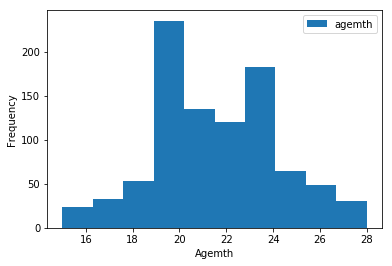

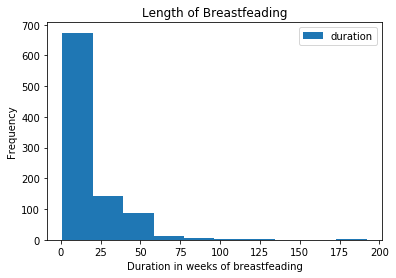

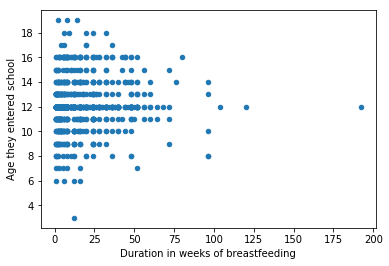

In [46]:
bfeed.plot(kind="hist", y= "agemth")
plt.xlabel("Agemth")
plt.show()
bfeed.plot(kind="hist", y= "duration")
plt.xlabel("Duration in weeks of breastfeading")
plt.title("Length of Breastfeading")
plt.show()
bfeed.plot("duration", "yschool", kind="scatter")
plt.xlabel("Duration in weeks of breastfeeding")
plt.ylabel("Age they entered school")
plt.show()


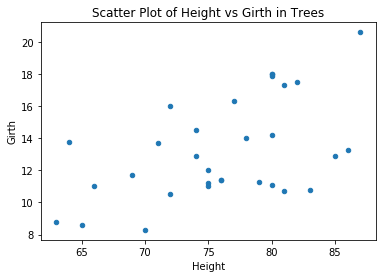

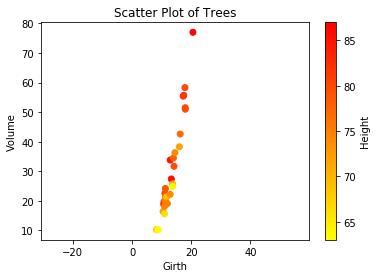

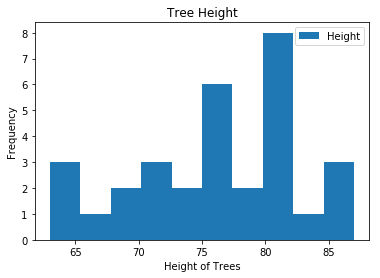

    Girth  Height  Volume
30   18.0      80    51.0
15   12.0      75    19.1
31   20.6      87    77.0
11   11.3      79    24.2
3     8.8      63    10.2


In [66]:
trees.plot(kind="scatter", x="Height", y= "Girth")
plt.title("Scatter Plot of Height vs Girth in Trees")
plt.show()
plt.scatter(trees["Girth"], trees["Volume"], c=trees["Height"], cmap='autumn_r')
plt.ylabel("Volume")
plt.xlabel("Girth")
cbar = plt.colorbar()
plt.axis('equal')
cbar.set_label("Height")
plt.title("Scatter Plot of Trees")
plt.show()
trees.plot(kind="hist", y= "Height")
plt.xlabel("Height of Trees")
plt.title("Tree Height")
plt.show()
#print(road.sample(5))
#print(birthwt.sample(5))
#print(sleep.sample(5))
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

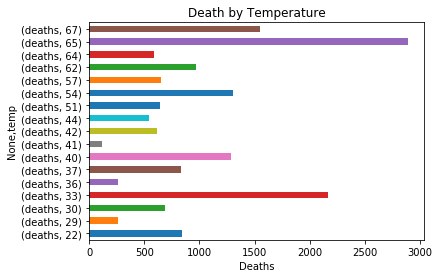

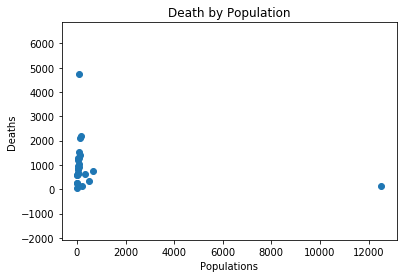

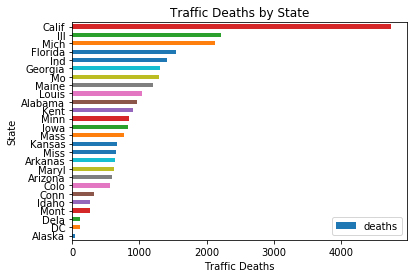

In [74]:
roadgroup = road.groupby(['temp'])
roadgroup[['deaths']].mean().unstack().plot(kind='barh')
plt.xlabel("Deaths")
plt.title("Death by Temperature")
plt.show()
plt.scatter(road['popden'], road["deaths"])
plt.ylabel("Deaths")
plt.xlabel("Populations")
plt.axis('equal')
plt.title("Death by Population")
plt.show()

road = road.sort_values('deaths')
road.plot(y= 'deaths', kind= 'barh')
plt.title("Traffic Deaths by State")
plt.xlabel("Traffic Deaths")
plt.ylabel("State")
plt.show()


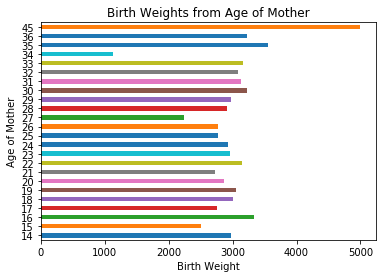

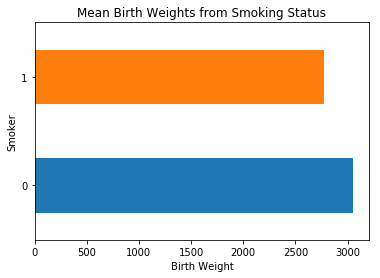

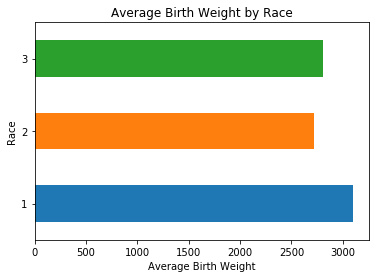

In [84]:
birthwt_age = birthwt.groupby('age')
birthwt_age['bwt'].mean().plot(kind = 'barh')
plt.xlabel("Birth Weight")
plt.ylabel("Age of Mother")
plt.title("Birth Weights from Age of Mother")
plt.show()

birthwt_age = birthwt.groupby('smoke')
birthwt_age['bwt'].mean().plot(kind = 'barh')
plt.xlabel("Birth Weight")
plt.ylabel("Smoker")
plt.title("Mean Birth Weights from Smoking Status")
plt.show()

birthwt_race = birthwt.groupby('race')
birthwt_race['bwt'].mean().plot(kind = 'barh')
plt.xlabel("Average Birth Weight")
plt.ylabel("Race")
plt.title("Average Birth Weight by Race")
plt.show()
#print(sleep.sample(5))
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

    extra  group  ID
10    2.0      1  10
19    4.6      2   9
18    1.6      2   8
7     3.7      1   7
20    3.4      2  10


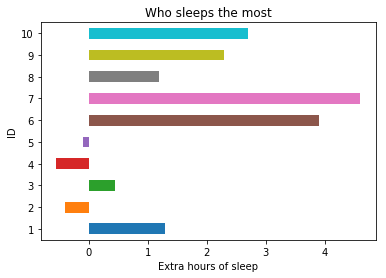

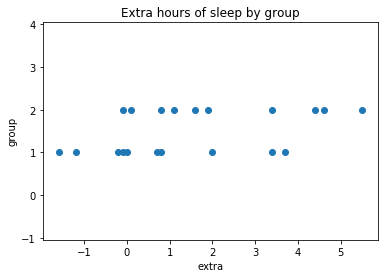

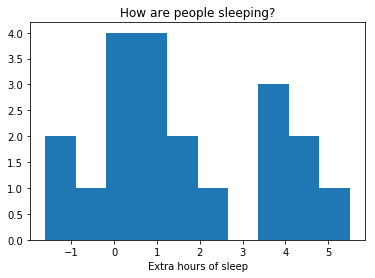

In [99]:
print(sleep.sample(5))
sleep_ID = sleep.groupby('ID')
sleep_ID['extra'].mean().plot(kind = 'barh')
plt.xlabel("Extra hours of sleep")
plt.ylabel("ID")
plt.title("Who sleeps the most")
plt.show()


plt.scatter(sleep["extra"], sleep["group"])
plt.ylabel("group")
plt.xlabel("extra")
plt.axis('equal')
plt.title("Extra hours of sleep by group")
plt.show()

plt.hist(sleep["extra"], bins = 10)
plt.xlabel("Extra hours of sleep")
plt.title("How are people sleeping?")
plt.show()

# Pandas 3:

### Problem 1:

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
72            6.1          2.8           4.0          1.3  versicolor
33            5.2          4.1           1.5          0.1      setosa
118           7.7          3.8           6.7          2.2   virginica
42            4.5          2.3           1.3          0.3      setosa
68            5.8          2.7           4.1          1.0  versicolor
{'virginica', 'setosa', 'versicolor'}


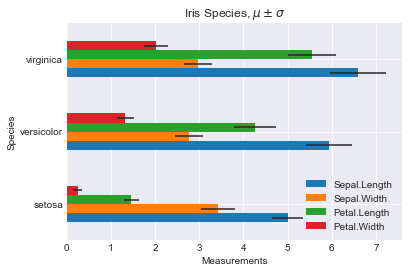

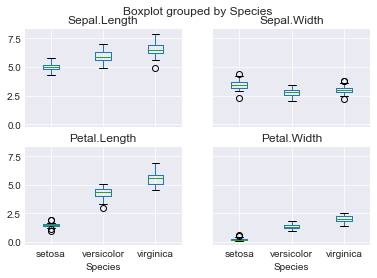

In [307]:
from pydataset import data

#Iris Data 
iris = data("iris")
print(iris.sample(5))
species = iris.groupby("Species")
numofspecies = set(iris["Species"])
print(numofspecies)
species[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].mean().plot(kind="barh", xerr=species.std(), title=r"Iris Species, $\mu\pm\sigma$")
plt.xlabel("Measurements")
iris.boxplot(["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"], by="Species", grid=True)
plt.show()



1.)  The Setosa is easiest to distinguish from the others because the measurements have the biggest deversion from virginica and versicolor in  petal width and length.
2.)  I would look at the petal length and the petal width to tell if it is a setosa.  to distinugish between a versicolor and verginica petal length would be the most telling, but also using sepal length might be helpful if compared to petal length becuase the mean is lower than verginica.  

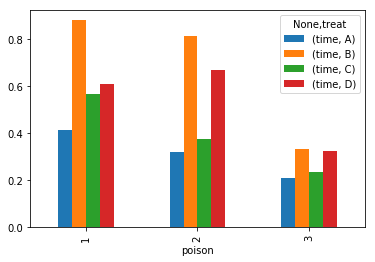

In [100]:
# Poisons Data
poisons = data("poisons")
#print(poisons.sample(5))
#print(diamonds.sample(5))
poison_gr_tr = poisons.groupby(["poison", "treat"])
#treatments = poison_group["A"].groupby("treat")
plt.show()

poison_gr_tr[["time"]].mean().unstack().plot(kind="bar")



Gernerally, Poison 1 is most deadly.  The treament that is most effect for all poisons is A.  ( Assuming that time is given recovery times. Or the time is how long the treament takes effect ) If I was poisoned then the treatment I would choose it Cure A even not knowing what poison I had because it is the most effective for each poison.

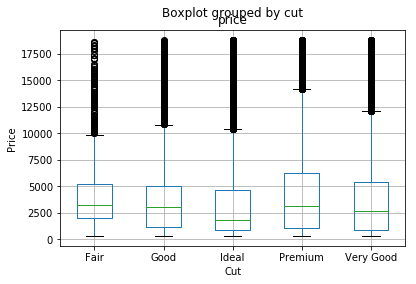

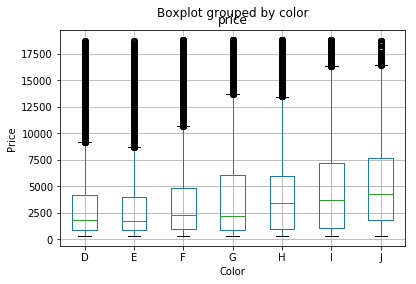

{'F', 'E', 'I', 'J', 'D', 'H', 'G'}


In [105]:
diamonds = data("diamonds")
diamonds.boxplot(["price"], by="cut")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()
diamonds.boxplot(["price"], by="color")
plt.xlabel("Color")
plt.ylabel("Price")
plt.show()




### Problem 2:

In [372]:
titanic_data = pd.read_csv("titanic.csv", header=0, index_col=None)
surv_embark = titanic_data.pivot_table(values="Survived", columns="Embarked", aggfunc="mean")
surv_embark_tot = titanic_data.pivot_table(values="Survived", columns="Embarked", aggfunc="count")
print(surv_embark, "\n")
print(surv_embark_tot, "\n")
surv_embark_sex = titanic_data.pivot_table(values="Survived", index="Sex", columns="Embarked", aggfunc="mean")
print(surv_embark_sex)

Embarked         C         Q         S
Survived  0.555556  0.357724  0.332604 

Embarked    C    Q    S
Survived  270  123  914 

Embarked         C         Q         S
Sex                                   
female    0.902655  0.616667  0.680412
male      0.305732  0.111111  0.170144


At first look it, embarking from C looks like you are more likely to survive.  However, this shouldn't be an automatic conclusion.  The country embarked from could be correlated with wealth and the price of the ticket, which was seen to be correlated with survival rate.

In [373]:
age = pd.qcut(titanic_data["Age"], 3)
surv_other = titanic_data.pivot_table(values="Survived", index=["Sex", "Pclass", age], columns="Embarked", aggfunc="mean")
print(surv_other)

Embarked                            C         Q         S
Sex    Pclass Age                                        
female 1.0    (0.166, 23.0]  1.000000       NaN  0.944444
              (23.0, 34.0]   1.000000  1.000000  0.928571
              (34.0, 80.0]   0.950000  1.000000  0.968750
       2.0    (0.166, 23.0]  1.000000       NaN  0.928571
              (23.0, 34.0]   1.000000  1.000000  0.868421
              (34.0, 80.0]        NaN       NaN  0.840000
       3.0    (0.166, 23.0]  0.764706  0.545455  0.450000
              (23.0, 34.0]   1.000000  0.285714  0.433333
              (34.0, 80.0]   0.666667  0.000000  0.368421
male   1.0    (0.166, 23.0]  0.714286       NaN  0.375000
              (23.0, 34.0]   0.437500       NaN  0.388889
              (34.0, 80.0]   0.350000  0.000000  0.278689
       2.0    (0.166, 23.0]  0.666667       NaN  0.292683
              (23.0, 34.0]   0.250000       NaN  0.090909
              (34.0, 80.0]   0.000000  0.000000  0.044444
       3.0    

***************************************************************************************************************************************************** EXPLAIN CONCLUSIONS

### Problem 3:

In [344]:
npk = data("npk")
npk.sample(5)
grouped = npk.groupby("")

,block,N,P,K,yield
2,1,1,1,0,62.8
12,3,0,0,1,55.0
5,2,1,0,0,59.8
21,6,1,0,1,57.2
7,2,0,0,1,55.5


             Fertility  Agriculture  Examination  Education  Catholic  \
Lausanne          55.7         19.4           26         28     12.11   
Val de Ruz        77.6         37.6           15          7      4.97   
Cossonay          61.7         69.3           22          5      2.82   
Rive Droite       44.7         46.6           16         29     50.43   
Glane             92.4         67.8           14          8     97.16   

             Infant.Mortality  
Lausanne                 20.2  
Val de Ruz               20.0  
Cossonay                 18.7  
Rive Droite              18.2  
Glane                    24.9  


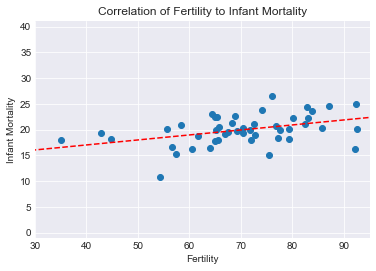

           Agriculture   Catholic  Education  Examination  Fertility  \
Catholic                                                               
(0, 20]      44.157692   7.165000  11.153846    19.961538  66.588462   
(20, 40]     54.550000  28.985000   4.500000    15.000000  77.050000   
(40, 60]     25.166667  50.366667  37.000000    25.000000  40.833333   
(60, 80]           NaN        NaN        NaN          NaN        NaN   
(80, 100]    65.518750  96.150000   6.625000     9.437500  80.550000   

           Infant.Mortality  
Catholic                     
(0, 20]           19.534615  
(20, 40]          20.750000  
(40, 60]          18.500000  
(60, 80]                NaN  
(80, 100]         20.775000  
Infant.Mortality  (10.799000000000001, 20.0]  (20.0, 26.6]
Fertility                                                 
(34.999, 64.7]                     21.294444     15.830000
(64.7, 70.4]                       36.288333      9.776667
(70.4, 78.45]                      45.817143     

In [367]:
swiss = data("swiss")
print(swiss.sample(5))
plt.scatter(swiss["Fertility"], swiss["Infant.Mortality"])
plt.axis("equal")
plt.xlim(30, 95)
plt.ylim(10, 30)
plt.xlabel("Fertility")
plt.ylabel("Infant Mortality")
plt.title("Correlation of Fertility to Infant Mortality")
slope, intercept, r_value, p_value, std_err = stats.linregress(swiss["Fertility"], swiss["Infant.Mortality"])
predict_y = intercept + slope * np.linspace(0, 100, 500)
plt.plot(np.linspace(0, 100, 500), predict_y, 'r--')
plt.show()
infant_mort = pd.qcut(swiss["Infant.Mortality"], 2)
fert = pd.qcut(swiss["Fertility"], 4)
cath = pd.cut(swiss["Catholic"], [0, 20, 40, 60, 80, 100])
catholic = swiss.pivot_table(index=cath)
catholic_2 = swiss.pivot_table(values="Catholic", index=fert, columns=infant_mort)
print(catholic)
print(catholic_2)

## Pandas 4:
*Special Thanks to Rebekah's code for the help

### Problem 1

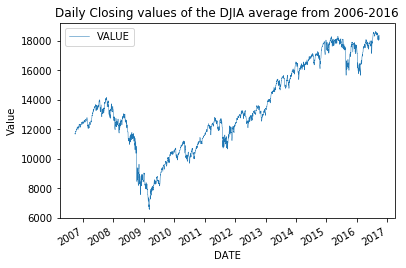

In [177]:
djia = pd.read_csv("DJIA.csv")
djia.index = pd.to_datetime(djia["DATE"], format="%Y-%m-%d")
djia = djia.drop(columns="DATE")
djia = djia[djia["VALUE"] != "."]
djia["VALUE"] = djia["VALUE"].astype(float)
djia.plot(y="VALUE", lw=.5)
plt.ylabel("Value")
plt.title("Daily Closing values of the DJIA average from 2006-2016")
plt.show()


### Problem 2.

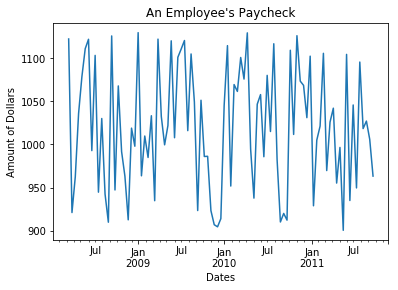

In [144]:
paychecks = pd.read_csv("paychecks.csv", header=None)
paychecks.head()
paychecks.index = pd.date_range(start="03/13/2008", periods=93, freq="2W-FRI")
paychecks.plot(legend=None)
plt.xlabel("Dates")
plt.ylabel("Amount of Dollars")
plt.title("An Employee's Paycheck")
plt.show()


### Problem 3.

         EARNINGS   EXPENSES
1978Q4  372572.16  122611.27
1979Q1  419440.58  133176.18
1979Q2  419766.49  154670.69
1979Q3  361453.31  209360.42
1979Q4  354463.33  174147.13


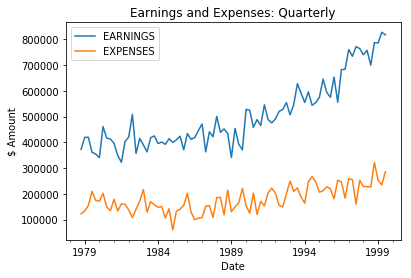

In [163]:
finances = pd.read_csv("finances.csv")
finances.head()
finances.index = pd.period_range(start= "09/01/1978",periods=len(finances), freq="Q-SEP")
finances.plot()
print(finances.head())
plt.xlabel("Date")
plt.ylabel("$ Amount")
plt.title("Earnings and Expenses: Quarterly")
plt.show()

### Problem 4.

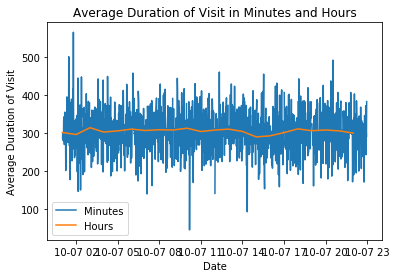

In [168]:
website_traffic = pd.read_csv("website_traffic.csv")
website_traffic.head()
website_traffic["ENTER"] = pd.to_datetime(website_traffic["ENTER"])
website_traffic["LEAVE"] = pd.to_datetime(website_traffic["LEAVE"])
website_traffic["Duration of Visit"] = (website_traffic["LEAVE"] - website_traffic["ENTER"]).dt.seconds
minutes = website_traffic.set_index('ENTER')['Duration of Visit']
plt.plot(minutes.resample('T').mean(), label="Minutes")
hours = website_traffic.set_index('ENTER')['Duration of Visit']
plt.plot(hours.resample('H').mean(), label="Hours")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Average Duration of Visit")
plt.title("Average Duration of Visit in Minutes and Hours")
plt.show()

### Problem 5:

In [204]:
gainsPday = djia - djia.shift(1)
djia["GainsPday"] = gainsPday
print("The single day with the largest gain:", djia["GainsPday"].idxmax())
print("The single day with the largest loss:", djia["GainsPday"].idxmin())
months = djia.resample('M').first() # .mean() ?
gainsPmonth = months - months.shift(1)
print("The month with the largest gain:", months["VALUE"].idxmax())
print("The month with the largest loss:", months["VALUE"].idxmin())
djia = djia.drop(columns="GainsPday")

The single day with the largest gain: 2008-10-13 00:00:00
The single day with the largest loss: 2008-09-29 00:00:00
The month with the largest gain: 2016-09-30 00:00:00
The month with the largest loss: 2009-03-31 00:00:00


### Problem 6:

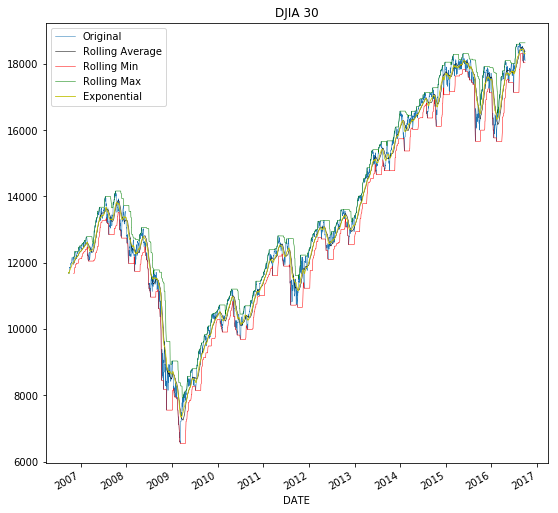

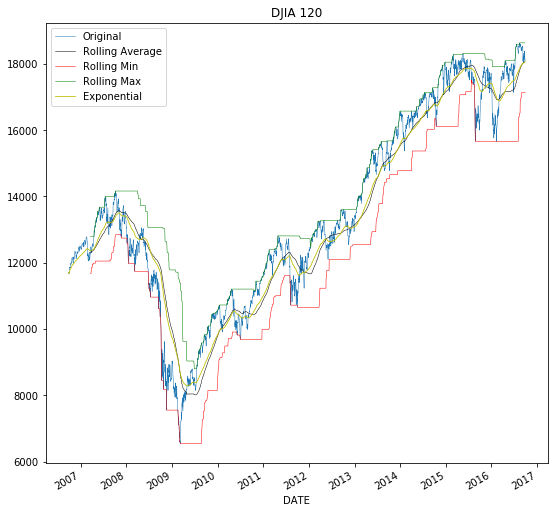

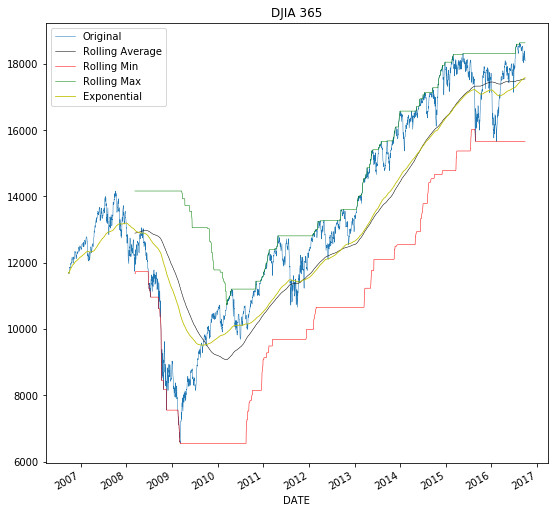

In [253]:
fig, ax = plt.subplots(figsize=(9,9))
ax.plot(djia, lw=.5)
djia.rolling(window=30).mean().plot(color='k', lw=.5, ax=ax, label="Rolling Average")
djia.rolling(window=30).min().plot(color='r', lw=.5, ax=ax, label="Rolling Min")
djia.rolling(window=30).max().plot(color='g', lw=.5, ax=ax, label="Rolling Max")
djia.ewm(span=30).mean().plot(color='y', lw=.8, ax=ax, label="Exponetial")
plt.title("DJIA 30")
plt.legend(["Original","Rolling Average", "Rolling Min", "Rolling Max", "Exponential"])
plt.show()

fig, ax = plt.subplots(figsize=(9,9))
ax.plot(djia, lw=.5)
djia.rolling(window=120).mean().plot(color='k', lw=.5, ax=ax, label="Rolling Average")
djia.rolling(window=120).min().plot(color='r', lw=.5, ax=ax, label="Rolling Min")
djia.rolling(window=120).max().plot(color='g', lw=.5, ax=ax, label="Rolling Max")
djia.ewm(span=120).mean().plot(color='y', lw=.8, ax=ax, label="Exponetial")
plt.title("DJIA 120")
plt.legend(["Original","Rolling Average", "Rolling Min", "Rolling Max", "Exponential"])
plt.show()

fig, ax = plt.subplots(figsize=(9,9))
ax.plot(djia, lw=.5)
djia.rolling(window=365).mean().plot(color='k', lw=.5, ax=ax, label="Rolling Average")
djia.rolling(window=365).min().plot(color='r', lw=.5, ax=ax, label="Rolling Min")
djia.rolling(window=365).max().plot(color='g', lw=.5, ax=ax, label="Rolling Max")
djia.ewm(span=365).mean().plot(color='y', lw=.8, ax=ax, label="Exponetial")
plt.title("DJIA 365")
plt.legend(["Original","Rolling Average", "Rolling Min", "Rolling Max", "Exponential"])
plt.show()

### Problem 7: A Lifetime of temperatures
A Blatant copy of Rebekah's.  I put it in to have for the future.

In [254]:
indianapolis = pd.read_csv("indianapolis.csv", index_col = 2)
miami = pd.read_csv("miami.csv", index_col = 2)
washingtondc = pd.read_csv("washingtondc.csv", index_col = 2)
chicago = pd.read_csv("chicago.csv", index_col = 2)
pittsburgh = pd.read_csv("pittsburgh.csv", index_col = 2)
cities = [indianapolis, miami, washingtondc, pittsburgh, chicago]

startDay = pd.to_datetime('1975-09-21').dayofyear

fig, ax = plt.subplots(figsize=(12,8))
for index, currentCity in enumerate(cities):
    # Convert index to a datetime object
    currentCity.index = pd.to_datetime(currentCity.index)
    # Find the ordinal day of the year
    currentCity['DayNum'] = currentCity.index.dayofyear
    
    currentCity['DayNum'] = np.where(currentCity['DayNum'] >= startDay, 
                                     currentCity['DayNum'] - startDay + 1, 
                                     366 + currentCity['DayNum'] - startDay)
    
    if index == 4:
        plt.scatter(currentCity['DayNum'], currentCity['TMAX'], c='#800000', linewidths=None, s=1/4)
        plt.scatter(currentCity['DayNum'], currentCity['TMIN'], c='#800000', linewidths=None, s=1/4)
    else:
        plt.scatter(currentCity['DayNum'], currentCity['TMAX'], c='black', linewidths=None, s=1/4)
        plt.scatter(currentCity['DayNum'], currentCity['TMIN'], c='black', linewidths=None, s=1/4)


born = (indianapolis.loc['1975-01-22','TMAX'] + indianapolis.loc['1975-01-22','TMIN']) / 2
league = (pittsburgh.loc['1988-07-14','TMAX'] + pittsburgh.loc['1988-07-14','TMIN']) / 2              
days = 366 + np.array([pd.to_datetime('1975-01-22').dayofyear, pd.to_datetime('1988-07-14').dayofyear]) - startDay

plt.plot(days, [born, league[0]], color='yellow', mec='black', mew=2, marker='o', ms=10, lw=0)           
plt.annotate('Born', xy=(days[0], born), xytext=(days[0], 90), 
                 arrowprops=dict(facecolor='black',shrink=0.05))
plt.annotate('Little League All-Star Team Wins Regional Championship', 
             xy=(days[1],league[0]), xytext=(days[1], 25), 
                 arrowprops=dict(facecolor='black',shrink=0.05))
              
plt.ylabel('Temperature (Farenheit)')
plt.xlabel('Day of Year')
plt.savefig('images/life_temp.png', bbox_inches='tight')
plt.show()

FileNotFoundError: File b'indianapolis.csv' does not exist

### Problem 9: Comparing segments of time series
Same as Problem 7.

In [454]:
import pandas as pd
import numpy as np
import datetime as dt

payems = pd.read_csv("payems.csv")
print(payems.sample(5))
payems['DATE'] = pd.to_datetime(payems['DATE'])
print(payems.sample(5))
#new =[payems["DATE"].strptime(x) for x in payems["DATE"]]
#for i in range(len(payems)):
#    if payems["DATE"] > "2018-5-1":
#        pass payems.loc[payems['DATE'].dt.year >= 2019] ==
payems.loc[payems['DATE'].dt.year >= 2019] 
payems["New_Date"] = payems.loc[payems['DATE'].dt.year >= 2019]['DATE'].apply(lambda x: x - pd.DateOffset(years=100))
print(payems.sample(5))
#pd.merge(payems['DATE'], payems["New_Date"])
payems["New_Date"].fillna(('0'))
print(payems.sample(5))

        DATE  PAYEMS
742   1/1/00  131007
262   1/1/60   54274
446   5/1/75   76623
201  12/1/54   49331
153  12/1/50   46855
          DATE  PAYEMS
351 2067-06-01   65750
116 2047-11-01   44487
280 2061-07-01   54123
926 2015-05-01  141545
248 2058-11-01   51944
          DATE  PAYEMS   New_Date
12  2039-03-01   30280 1939-03-01
161 2051-08-01   48009 1951-08-01
420 1973-03-01   76285        NaT
800 2004-11-01  132525        NaT
440 1974-11-01   78261        NaT


NameError: name 'Timestamp' is not defined

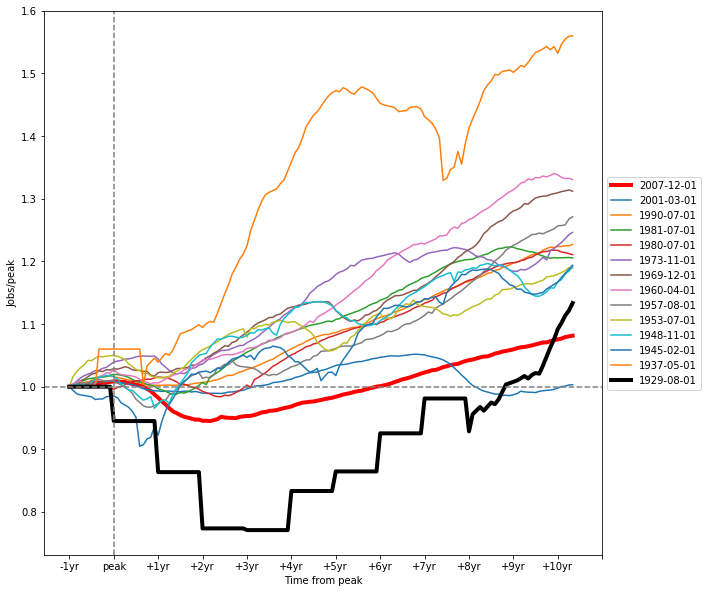

In [255]:
nonAgJobs = pd.read_csv("payems.csv")
# adjust scale
nonAgJobs['PAYEMS'] = nonAgJobs['PAYEMS'] * 1000
# set dates to index
nonAgJobs['DATE'] = pd.to_datetime(nonAgJobs['DATE'])
# until 1968, the the dates are off by 100 years
nonAgJobs.iloc[:358,0] = nonAgJobs.iloc[:358,0] - pd.DateOffset(years=100)
nonAgJobs = nonAgJobs.set_index('DATE')

# Start of the last 14 recessions
# Changed the months of the recessions beginning in 1937 and 1929 since 
# the data is only annual in this time period
recStart = np.array(['2007-12-01', '2001-03-01', '1990-07-01', '1981-07-01', 
                           '1980-07-01', '1973-11-01', '1969-12-01', '1960-04-01',
                           '1957-08-01', '1953-07-01', '1948-11-01', '1945-02-01',
                           '1937-07-01', '1929-07-01'], dtype ='datetime64')

# Add extra data for missing months
for ii in range(9):
    nonAgJobs = nonAgJobs.append([nonAgJobs.iloc[ii]]*11)
nonAgJobs = nonAgJobs.sort_index(axis=0)

jobGrowth = np.empty((14,137))
startid = []
# Get the index of the start of each recessiong
for ii in range(12):
    startid.append(nonAgJobs.index.get_loc(recStart[ii]))
    
startid.append(100)
startid.append(12)

for ii in range(14):
    jobGrowth[ii] = list(nonAgJobs.iloc[startid[ii]-12:startid[ii]+125, 0])
        
# Normalize each of the 14 series such that the jobs level at the peak date equals 1.
row_start = jobGrowth[:,0]
jobGrowth = jobGrowth / row_start[:,None]

# Plot each of the 14 series as a line plot (with no markers) on the same axes with 
# the peak jobs level of 1 on top of each other for each series.
fig, ax = plt.subplots(figsize = (10,10))
for ii in range(14):
    if ii == 0:
        plt.plot(jobGrowth[ii], 'r-', lw=4, label=recStart[ii])
    elif ii == 12:
        plt.plot(jobGrowth[ii], label='1937-05-01')
    elif ii == 13:
        plt.plot(jobGrowth[ii], 'k-', lw=4, label='1929-08-01')
    else:
        plt.plot(jobGrowth[ii], label=recStart[ii])
        
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Jobs/peak")
plt.xlabel("Time from peak")
labels = ['-1yr', 'peak', '+1yr', '+2yr', '+3yr', '+4yr',
          '+5yr', '+6yr', '+7yr', '+8yr', '+9yr', '+10yr']
plt.xticks(np.arange(0, 145, 12), labels)

x = np.linspace(0, 145, 144)
ax.axhline(1, ls='--', linewidth=1.5, color='grey')
ax.axvline(12, ls='--', linewidth=1.5, color='grey')
plt.show()